# Ejercicio 11

En este ejercicio vamos a aplicar PCA y LDA a unos datos sintéticos en los que conocemos la población de partida.

In [1]:
# Load required libraries:
if (!require("MASS")) install.packages("MASS")
if (!require("mvtnorm")) install.packages("R.utmvtnormils")
if (!require("R.utils")) install.packages("R.utils")


Loading required package: MASS

Loading required package: mvtnorm

Loading required package: R.utils

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




## 1 Preparación de los datos
Genera una base de datos sintética formada por dos muestras normales bidimensionales de 100 elementos (usa la función `rmvnorm`, de `library(mvtnorm)`) con la misma matriz de covarianza y distinta media. Crea una variable de tipo factor que permita distinguir a qué clase pertenece cada dato y une las dos muestras en un mismo data frame (`rbind`). Visualiza estos datos en un diagrama de dispersión.

In [2]:
my_dist <- function(N, mu_x, mu_y, var_x, var_y, cov_xy){
    
    #
    # Bivariate normal distibution
    # X-axis: normally distributed (mean = mu_x, sd = sqrt(var_x));
    #         associated with class 0.
    # Y-axis: normally distributed (mean = mu_y, sd = sqrt(var_y))
    #         associated with class 1.
    #
    # @description Bivariate normal distribution.
    # X-axis: normally distributed (mean = mu_x, sd = sqrt(var_x));
    #         associated with class 0.
    # Y-axis: normally distributed (mean = mu_y, sd = sqrt(var_y))
    #         associated with class 1.
    #
    # @param N: int > 0.   Sample size.
    # @param mu_x:  float. Population mean for x-axis.
    # @param mu_y:  float. Population mean for y-axis.
    # @param var_x: float. Population variance for x-axis.
    # @param var_y. float. Population variance for y-axis.
    #
    # @return : Nx2 numeric array. If N = 1 a vector of the 
    # same length as mu, otherwise an N by length(mu) matrix 
    # with one sample in each row.
    # 
    
    return(mvrnorm(N, 
                    mu = c(mu_x, mu_y),
                    Sigma = matrix(c(var_x, cov_xy, cov_xy, var_y), nrow = 2)))
}

In [3]:
# Create sample x_1: 
x_1 <- my_dist(N = 100, mu_x = 2, mu_y = 4, var_x = 1, var_y = 1, cov_xy = 0.3)

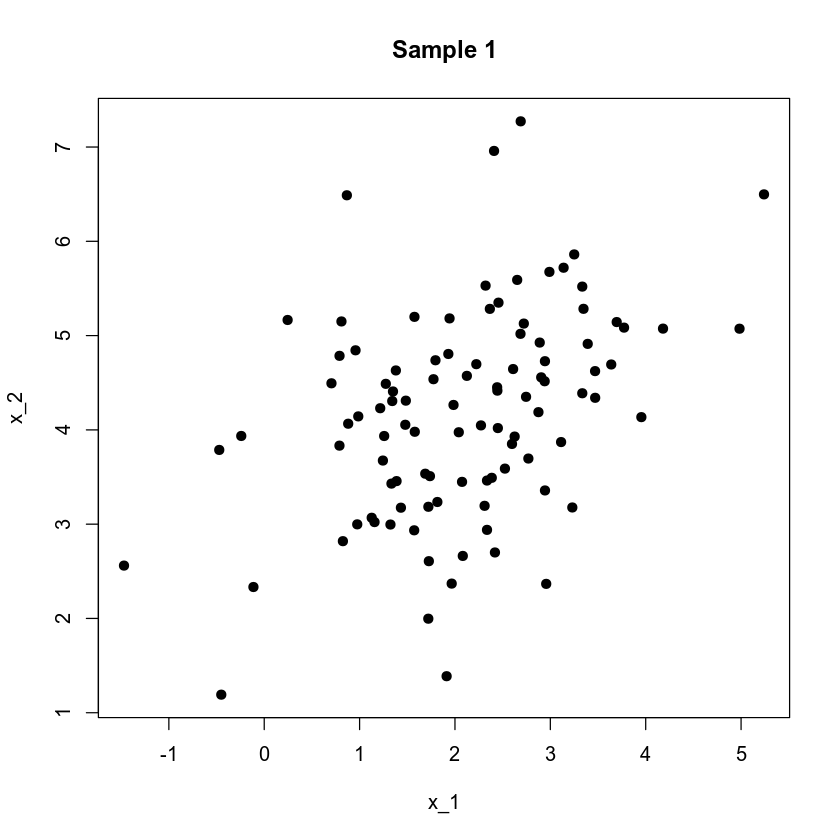

In [32]:
# Plot sample
plot(x_1, pch = 19, col  ='black', xlab = "x_1", ylab = "x_2", main = "Sample 1")

In [5]:
# Create y_1 matrix: 
# nrow(y_matrix) = nrow(x_1)
# Associated with class 0
y_1 <- as.matrix(rep(0, nrow(x_1)))

In [6]:
# Create sample x_2
x_2 <- my_dist(N = 100, mu_x = 6, mu_y = 3, var_x = 1, var_y = 1, cov_xy = 0.3)

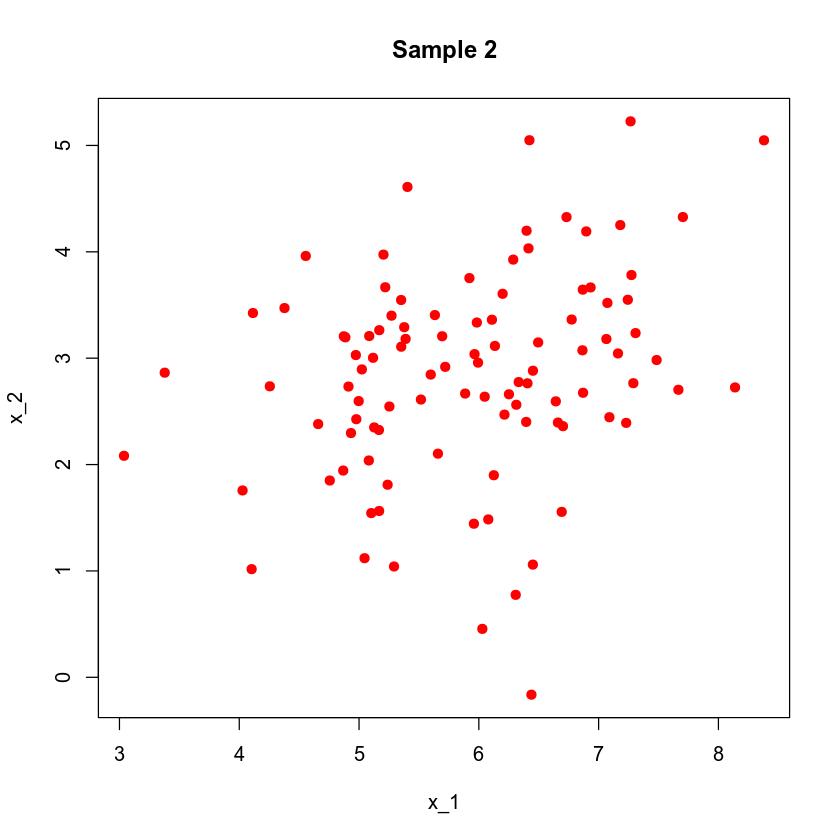

In [33]:
# Plot sample
plot(x_2, pch = 19, col = 'red', xlab = "x_1", ylab = "x_2", main = "Sample 2")

In [8]:
# Create y_2 matrix: 
# nrow(y_2) = nrow(x_2)
# Associated with class 1
y_2 <- as.matrix(rep(1, nrow(x_2)))

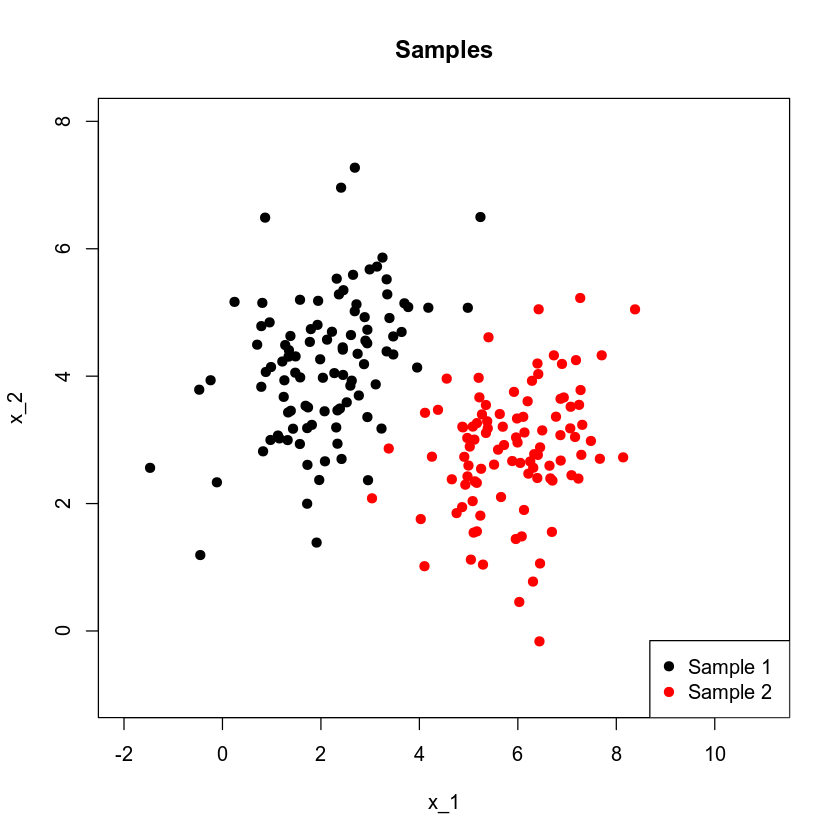

In [34]:
plot(x_1, pch = 19, col = 'black', 
     xlim = c(-2,11), ylim = c(-1, 8),
     xlab = "x_1", ylab = "x_2",
     main = "Samples") # Plot sample 1

points(x_2, pch = 19, col = 'red') # Plot sample 2

legend("bottomright", pch = c(19,19), lty = c(0,0),
       c("Sample 1", "Sample 2"), col = c("black", "red"))

In [10]:
# Combine x_1, x_2. Row binding.
# x_train: sample for training our model
x_train <- rbind(x_1, x_2)

In [11]:
# Combine y_1, y_2. Row binding.
# y_train: observed classes for training
y_train <- rbind(y_1, y_2)

## 2 Aplicación de PCA
### 2.1 Aplica un PCA a estos datos y representa el resultado (`plot`). Los PCs representan las proyecciones en este nuevo espacio dado por las EOFs. 

### 2.2 Representa esas nuevas direcciones en un diagrama de dispersión junto con los datos originales (puedes usar `arrows` para indicar las direcciones). 

### 2.3 Calcula la proyección de los datos originales sobre la primera nueva dirección, EOF1, ($X \approx \bar{X} + Z_{1}P_{1}^{t}$) y añade al gráfico de dispersión el segmento que une cada dato original con su proyección (`segments`).

Calculamos las componentes principales:

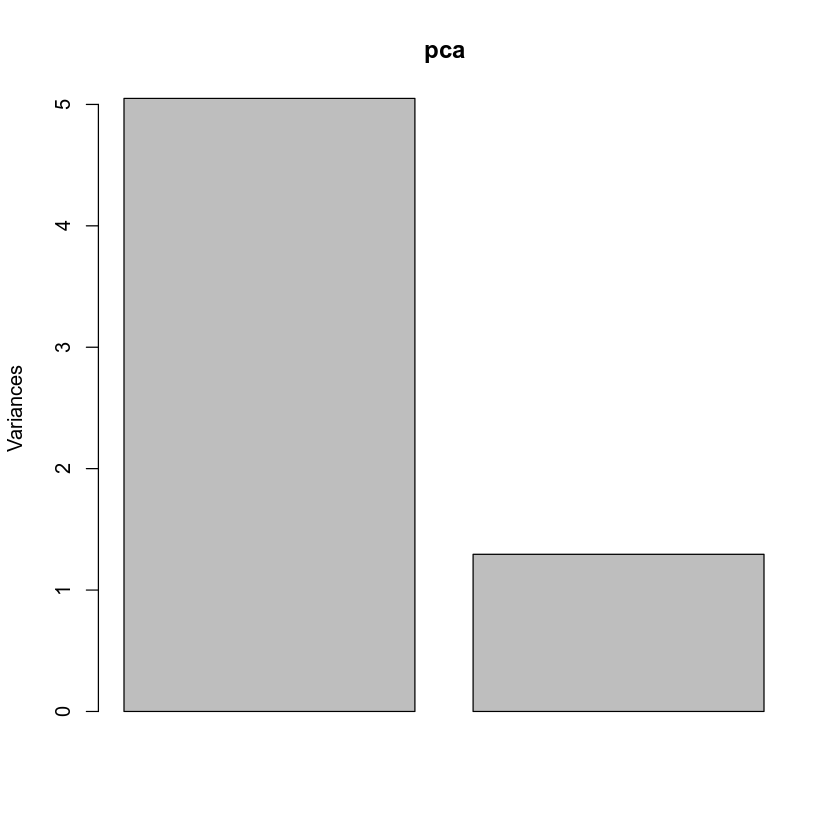

In [12]:
pca <- prcomp(x_train)
plot(pca)
#El método plot devuelve un gráfico de las varianzas (eje Y)
# asociada con cada PC (eje X).
# Este gráfico es útil para decidir cuántas PCs 
# retener para análisis posteriores. De forma alternativa,
# puede utilizarse la función screeplot con el mismo fin.

Sólo hay dos. Mostramos la proporcion de varianza acumulada:

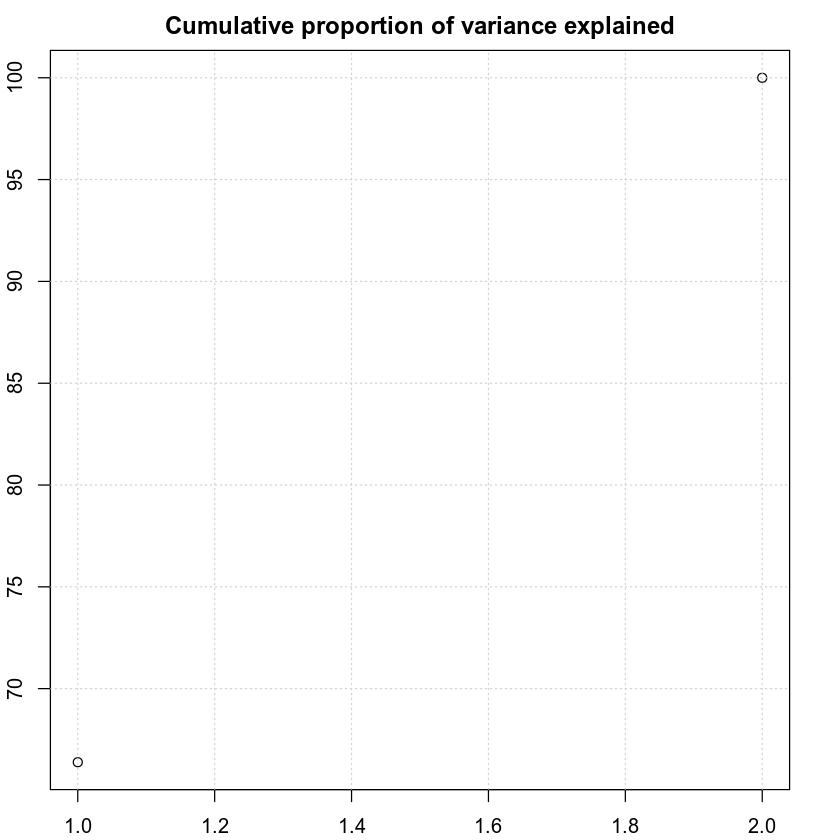

In [13]:
par(mfrow=c(1,1), mar=c(2.1,2.1,2.1,2.1))
plot(cumsum(pca$sdev)/sum(pca$sdev)*100,main="Cumulative proportion of variance explained")
grid()

In [14]:
print(pca)

Standard deviations (1, .., p=2):
[1] 2.247149 1.137773

Rotation (n x k) = (2 x 2):
            PC1        PC2
[1,]  0.9698905 -0.2435414
[2,] -0.2435414 -0.9698905


Empleamos biplot para mostrarlas en el espacio original:

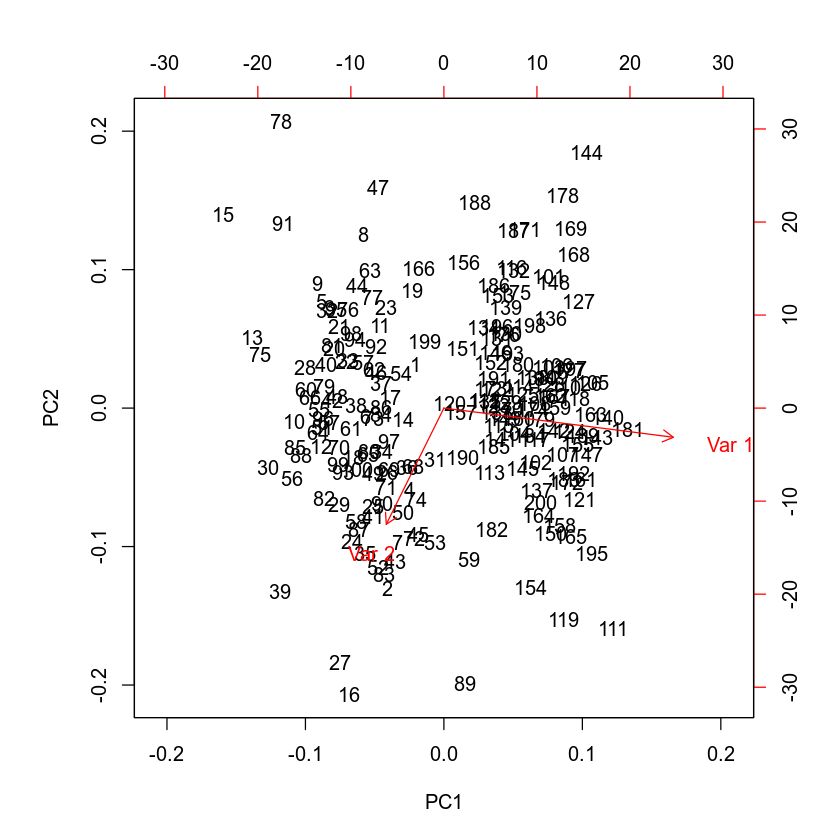

In [15]:
biplot(pca)

In [16]:
projected <- predict(pca, newdata = x_train)[,1]

In [17]:
# SAME AS
#trainPC <- pca$x[,1]
#trainPC

Reconstruimos las pca en el espacio original:

Escogemos scale = F ya que hemos aplicado `prcomp` con los parámetros por defecto.

In [50]:
# + pca$center[1]
xrecovery = pca$x[,1] %*% t(pca$rotation[,1])
xrecovery = scale(xrecovery, center = - rep(pca$center[1], 2) , scale = F)
# rotation: matrix of variable loadings. Columns are eigenvectors
# x: scores. The coordinates of the individuals (observations) on the PC
# sdev: sdev. The standard deviations of PCs
# center: center. The variable means (means are substracted)
# scale: sclae. The variable sds (the scaing applied to each variabeles)

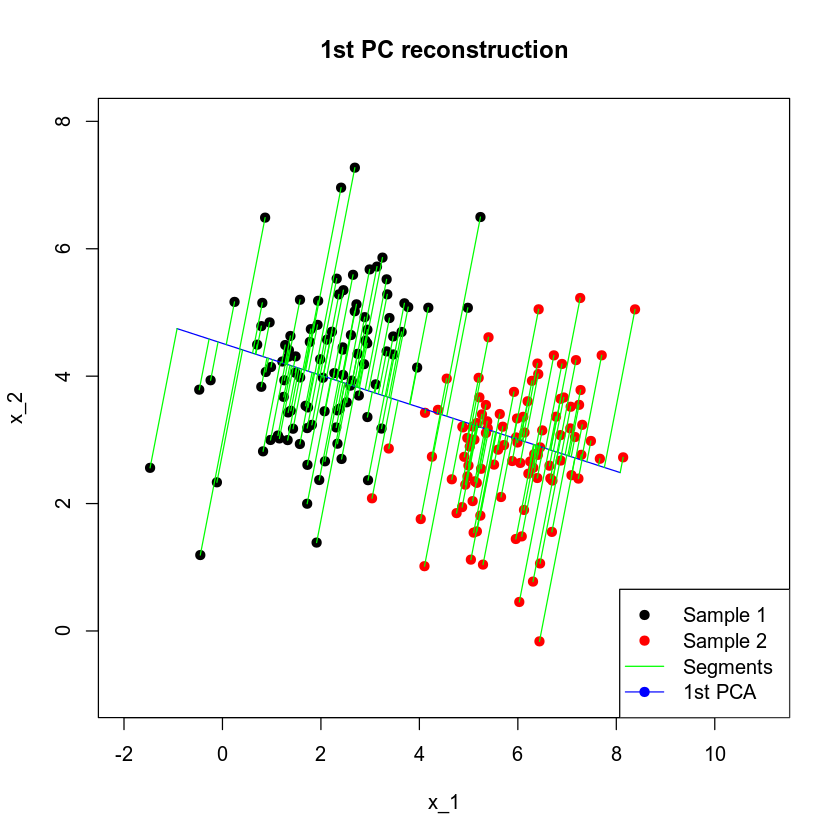

In [59]:
plot(x_1, pch = 19, col = 'black', 
     xlim = c(-2,11), ylim = c(-1, 8),
     xlab = "x_1", ylab = "x_2",
     main = "1st PC reconstruction") # Plot sample 1

points(x_2, pch = 19, col = 'red') # Plot sample 2

points(xrecovery, type = "l", col = "blue")

segments(x0 = x_train[,1], x1 = xrecovery[,1],
         y  = x_train[,2], y1 = xrecovery[,2],
         col = 'green')

legend("bottomright", pch = c(19,19, NA, 19), lty = c(0,0, 1, 1),
       c("Sample 1", "Sample 2", "Segments", "1st PCA"), col = c("black", "red", "green", "blue"))

Observamos que, a pesar de recoger la mayor parte de la varianza (casi el 70%), no nos siver para nuestro propósito de clasificación. Por tanto, hemos de usar otras técnicas. 

In [54]:
# + pca$center[1]
xrecovery = pca$x[,1] %*% t(pca$rotation[,1])
xrecovery = scale(xrecovery, center = - pca$center , scale = F)
# rotation: matrix of variable loadings. Columns are eigenvectors
# x: scores. The coordinates of the individuals (observations) on the PC
# sdev: sdev. The standard deviations of PCs
# center: center. The variable means (means are substracted)
# scale: sclae. The variable sds (the scaing applied to each variabeles)

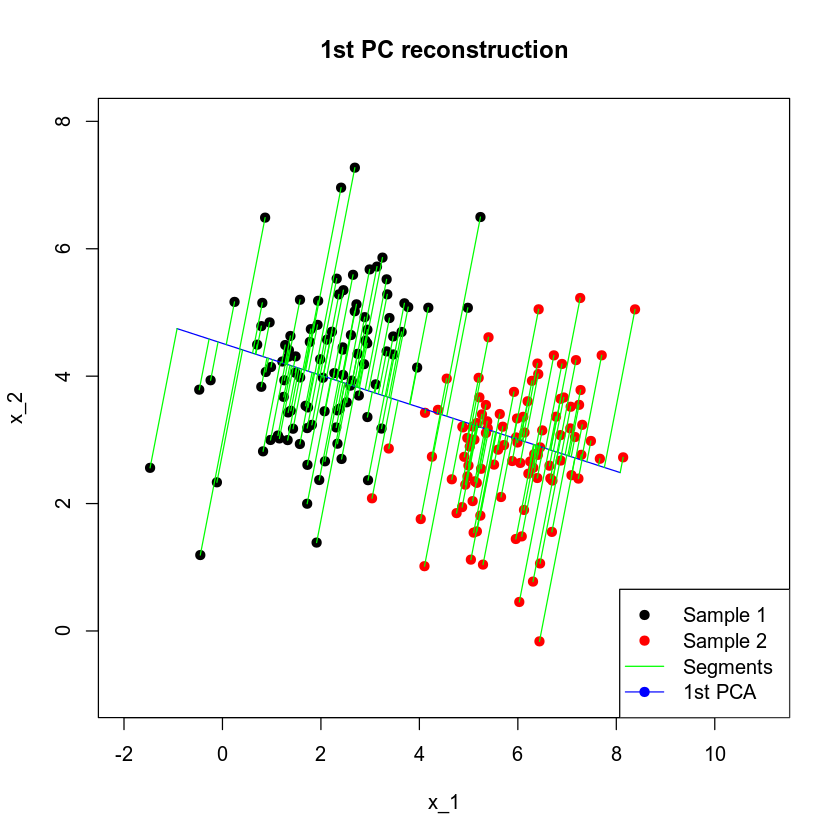

In [55]:
plot(x_1, pch = 19, col = 'black', 
     xlim = c(-2,11), ylim = c(-1, 8),
     xlab = "x_1", ylab = "x_2",
     main = "1st PC reconstruction") # Plot sample 1

points(x_2, pch = 19, col = 'red') # Plot sample 2

points(xrecovery, type = "l", col = "blue")

segments(x0 = x_train[,1], x1 = xrecovery[,1],
         y  = x_train[,2], y1 = xrecovery[,2],
         col = 'green')

legend("bottomright", pch = c(19,19, NA, 19), lty = c(0,0, 1, 1),
       c("Sample 1", "Sample 2", "Segments", "1st PCA"), col = c("black", "red", "green", "blue"))

## 3 Aplicación de LDA
### 3.1 Utiliza la información de las clases para aplicar un LDA a estos datos y representa el resultado (`plot`).

### 3.2 Representa un diagrama de dispersión con los datos originales y añade los centroides de las dos clases y la nueva dirección. Ver la ayuda de `?lda` para identificar esos parámetros en la salida de la función.

En el ejercico anterior, hemos podido comprobar que la técnica de PCA no es la más adecuada, pues no permite clasificar de manera adecuada. La dirección de máxima varianza no es la mejor opción. Es por ello que necesitamos utilizar otras técnica, por ejemplo LDA. 

Nos será útil el siguiente dataframe:

In [20]:
my_df <- data.frame(clase = y_train, pred = x_train)

Entrenamos con LDA:

In [21]:
lda.fit <- lda(clase ~ ., data = my_df)

Veamos qué nos devuelve:

In [22]:
lda.fit

Call:
lda(clase ~ ., data = my_df)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
    pred.1   pred.2
0 2.084291 4.172359
1 5.911429 2.848701

Coefficients of linear discriminants:
              LD1
pred.1  0.9519137
pred.2 -0.6153202

El output de LDA nos indica que $\hat{\pi}_{2}=0.5$ y $\hat{\pi}_{1}=0.5$. Es decir, el 50% de la sobservaciones corresponden a instancias clasificadas como 0 y el 50% corresponde a instancias clasificadas como 1. Esto ya lo sabíamos pues nosotros mismos hemos construido los datos. 

También nos devuelve los group means; es decir, las medias para cada predictor y cada clase, que son estimaciones de LDA para $\mu_{k}$. 


Los ***coefficients of linear discriminant*** nos devuelve la combinación lineal de pred.1 y pred.2 que es empleada en la regla LDA.


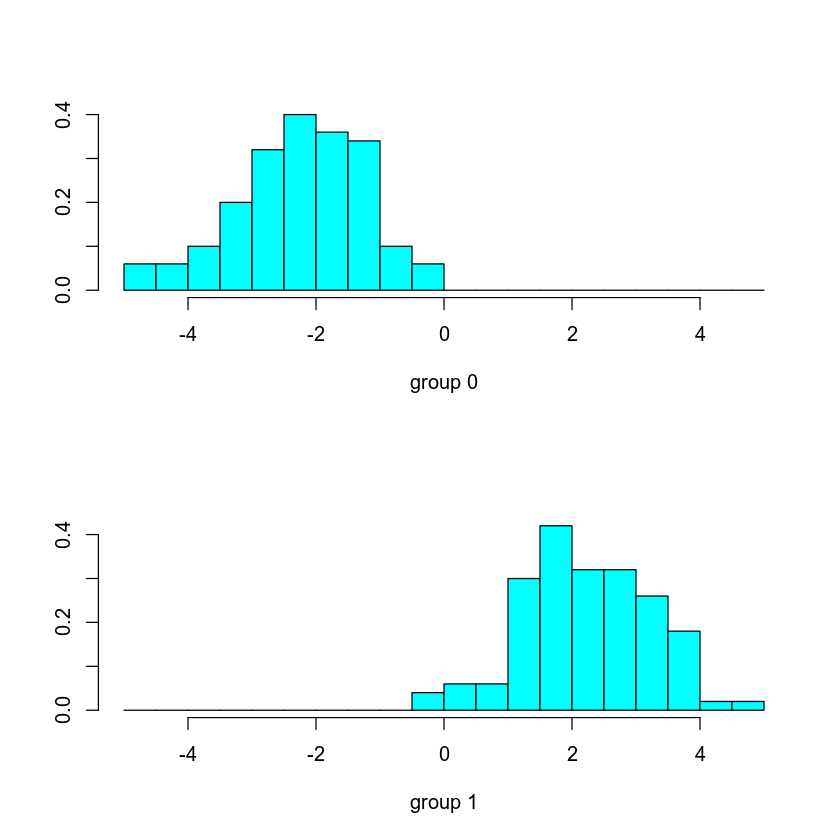

In [23]:
plot(lda.fit)

Al invocar a la función `plot`, nos devuelve imágenes de los ***linear discriminant*** obtenidas mediante $1.0173760 \cdot \text{pred.1} - -0.6138946 \cdot \text{pred.2}$ para cada muestra. La primera imagen para las clasificadas como 0; la segunda imagen para las clasificadas como 1.

Hacemos un diagrama de dispersion y añadimos los cruces:

In [24]:
lda.fit$mean

,pred.1,pred.2
0,2.084291,4.172359
1,5.911429,2.848701


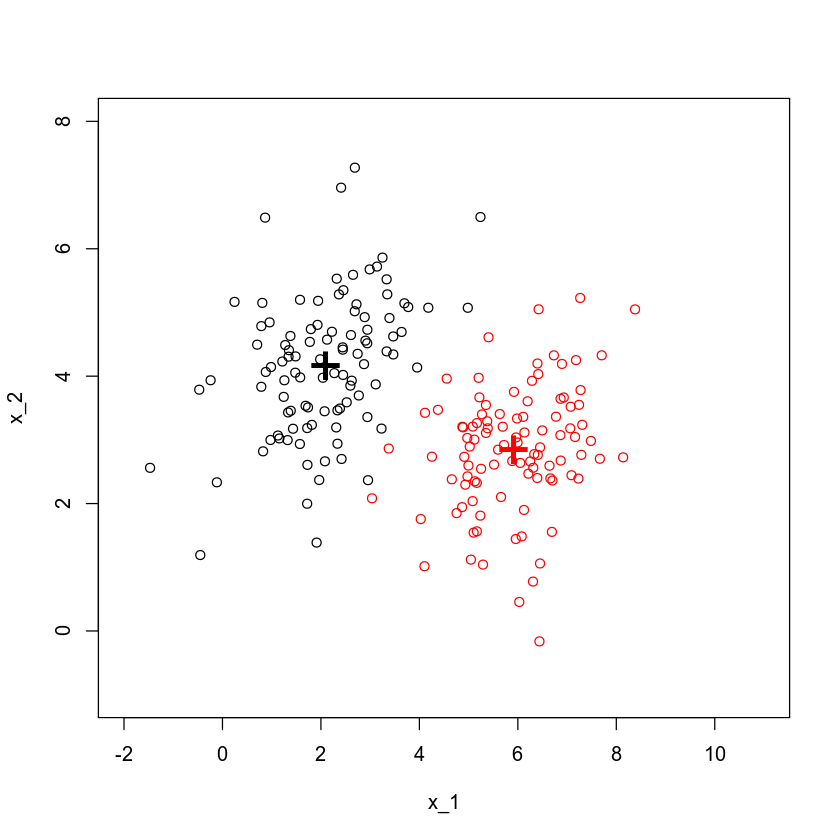

In [31]:
plot(x_1, col = 'black', 
     xlim = c(-2,11), ylim = c(-1, 8),
     xlab = "x_1", ylab = "x_2") # Plot sample 1

points(x_2, col = 'red') # Plot sample 2

points(lda.fit$means, pch = "+", cex = 3, col = c("black", "red"))

También podemos añadir la resta que, comprobamos, esta vez sí clasifica correctamente:

In [26]:
lda.fit$scaling

,LD1
pred.1,0.9519137
pred.2,-0.6153202


In [27]:
# draw discrimination line
np <- 300
nd.x <- seq(from = min(my_df$pred.1), to = max(my_df$pred.1), length.out = np)
nd.y <- seq(from = min(my_df$pred.2), to = max(my_df$pred.2), length.out = np)
nd <- expand.grid(pred.1 = nd.x, pred.2 = nd.y)

In [28]:
prd <- as.numeric(predict(lda.fit, newdata = nd)$class)

In [29]:
# Sumamos 1 a las clases de modo que las clases han pasado de ser 0, 1 a ser 1, 2 respetivamente. Es para que
# col = my_df$clase funcione adecuadamente

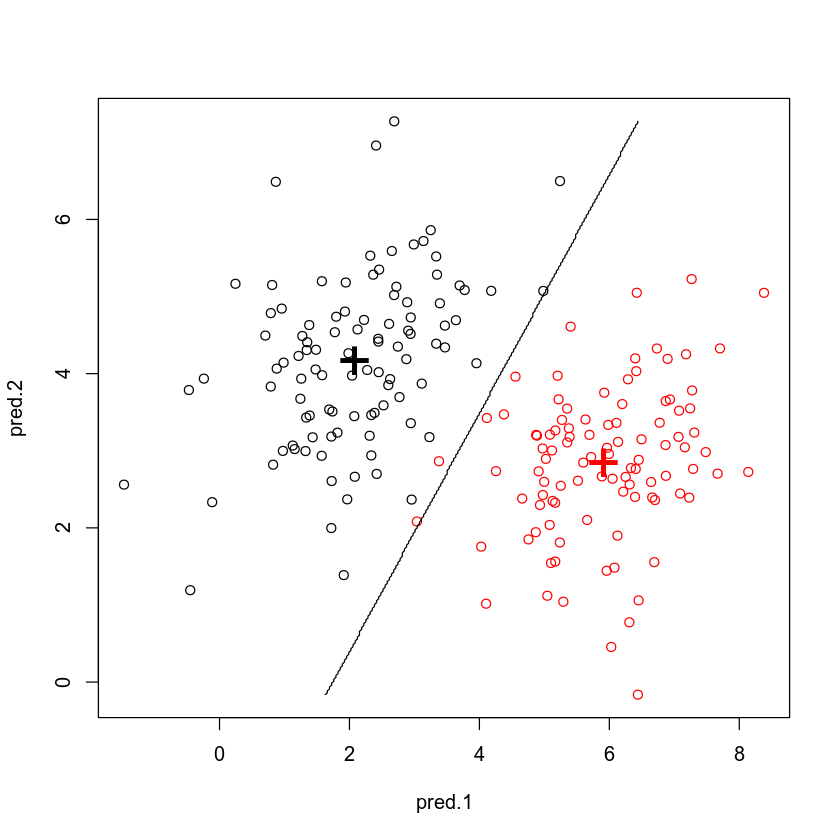

In [30]:
plot(my_df[, 2:3], col = my_df$clase + 1)
points(lda.fit$means, pch = "+", cex = 3, col = c("black", "red"))
contour(x = nd.x, y = nd.y, z = matrix(prd, nrow = np, ncol = np), 
        levels = c(1, 2), add = TRUE, drawlabels = FALSE)